# CAP 5768 - Data Science - Dr. Marques - Fall 2019

## Assignment 4: Statistical analysis - Part 2
## Starter code

### Goals 

- To practice the computation and displaying of representative statistical distributions.
- To expand upon the prior experience of manipulating, summarizing, and visualizing small datasets.
- To compute moments and skewness measures.
- To increase our statistical analysis skills.
- To estimate the parameters of a distribution and propose a model that explains the underlying data.


### Instructions

- This assignment is structured in 3 parts, each one using their own dataset(s).
- As usual, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will become your report.
- Submit the report (PDF), notebook (.ipynb file), and (optionally) link to the "live" version of your solution on Google Colaboratory via Canvas.
- The total number of points is 142 (plus up to 40 bonus points).

### Important

- It is OK to attempt the bonus points, but please **do not overdo it!** 

In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as ss

-------------------
## Part 1: Representative analytic distributions

In this part we will look at how to generate and plot analytic distributions.

The Python code below generates and plots the PDF and CDF of a normal (Gaussian) distribution whose parameters are *mu* and *sigma*.

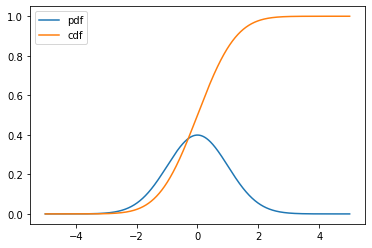

In [2]:
x = np.linspace(-5, 5, 5000)
mu = 0
sigma = 1

y_pdf = ss.norm.pdf(x, mu, sigma) # the normal pdf
y_cdf = ss.norm.cdf(x, mu, sigma) # the normal cdf

plt.plot(x, y_pdf, label='pdf')
plt.plot(x, y_cdf, label='cdf')
plt.legend();

## Your turn! (12 points, i.e., 6 pts each)

Write code to:

1. Plot the PDF of three exponential distributions (with *lambda* equal to 0.5, 1, and 2) on the same plot. 
They will probably look like this:
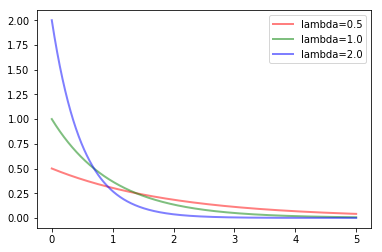

2. Plot the CDF of three exponential distributions (with *lambda* equal to 0.5, 1, and 2) on the same plot.
They will probably look like this:
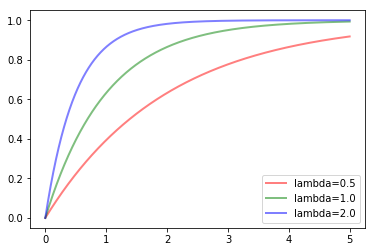

## Solution

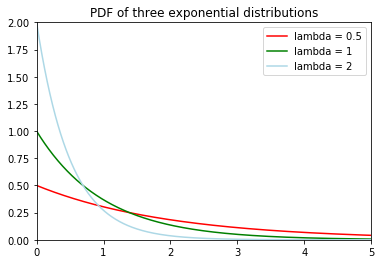

In [3]:
col = {0.5: 'red', 1: 'green', 2: 'lightblue'}

X = np.arange(0, 5, 0.01)

A = []
for L in 0.5,1,2:
    P = L*np.exp(-L*X)
    a = plt.plot(X, P, '-', color=col[L], lw=1.5)
    A.append(a)

plt.title("PDF of three exponential distributions")
plt.axis([0, 5, 0, 2])
plt.legend(('lambda = 0.5', 'lambda = 1', 'lambda = 2'), loc='upper right')
plt.show()

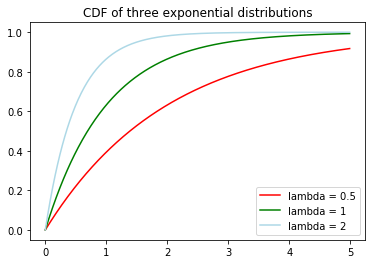

In [4]:

A = []
for L in 0.5,1,2:
    P = 1- np.exp(-L*X)
    a = plt.plot(X, P, '-', color=col[L], lw=1.5)
    A.append(a)
    
plt.title("CDF of three exponential distributions")
plt.legend(('lambda = 0.5', 'lambda = 1', 'lambda = 2'), loc='lower right')
plt.show()

-------------------
## Part 2: Empirical distributions vs. analytic distributions

The question we are trying to answer in this part is: **How well can we model empirical distributions with analytic distributions?**

Let's start by asking the question **Are the Belmont Stakes results normally distributed?**

*For context: Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. Secretariat ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. These two outliers have been removed from the data set, which has been obtained by scraping the Belmont Wikipedia page.* (The file ``belmont.csv`` is available on Canvas, if you want to learn more about the race's results.)

The code below:
- computes mean and standard deviation of Belmont winners' times with the two outliers removed.
- takes 10,000 samples out of a normal distribution with this mean and standard deviation using
``np.random.normal()``.
- computes the CDF of the theoretical samples and the ECDF of the Belmont winners' data, assigning the results to x_theor, y_theor and x, y, respectively.
- plots the CDF of your samples with the ECDF, with labeled axes.

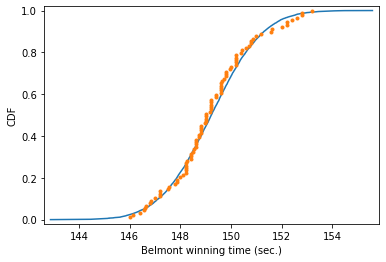

In [5]:
import numpy as np
import matplotlib.pyplot as plt

belmont_no_outliers = np.array([148.51,  146.65,  148.52,  150.7,  150.42,  150.88,  151.57,
                                147.54,  149.65,  148.74,  147.86,  148.75,  147.5,  148.26,
                                149.71,  146.56,  151.19,  147.88,  149.16,  148.82,  148.96,
                                152.02,  146.82,  149.97,  146.13,  148.1,  147.2,  146.,
                                146.4,  148.2,  149.8,  147.,  147.2,  147.8,  148.2,
                                149.,  149.8,  148.6,  146.8,  149.6,  149.,  148.2,
                                149.2,  148.,  150.4,  148.8,  147.2,  148.8,  149.6,
                                148.4,  148.4,  150.2,  148.8,  149.2,  149.2,  148.4,
                                150.2,  146.6,  149.8,  149.,  150.8,  148.6,  150.2,
                                149.,  148.6,  150.2,  148.2,  149.4,  150.8,  150.2,
                                152.2,  148.2,  149.2,  151.,  149.6,  149.6,  149.4,
                                148.6,  150.,  150.6,  149.2,  152.6,  152.8,  149.6,
                                151.6,  152.8,  153.2,  152.4,  152.2])

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

# Seed random number generator
np.random.seed(42)

# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()


## Questions 1-2 (6 points, i.e., 3 pts each)

1. Does the empirical distribution of the data resemble a normal distribution? 
2. What other *plots* could you produce to better investigate (visually) the claim that the Belmont Stakes results are normally distributed? 

## Solution

1. Yes, the empirical distribution of the data resemble a normal distribution.


2. The histogram and the normal probability plot (showed above) are most common plots used to investigate if data is normally distributed. 
In a normal distribution the histogram is symmetrical with a single central peak at the mean or average of the data. The shape of the curve is described as bell-shaped with the graph falling off evenly on either side of the mean. Then, fifty percent of the distribution lies to the left of the mean and fifty percent lies to the right of the mean. These graphs are called normal curves, and referred to as a normal distribution. The mean, median and mode are all the same in a normal distribution. In that way, making a histogram of your data help you to decide whether or not a set of data is normal.However, there is a more specialized graph called a normal probability plot. This plot graphs z-scores (normal scores) against your data set.A straight, diagonal line means that you have normally distributed data. If the line is skewed to the left or right, it means that you do not have normally distributed data.


## BONUS (20 points)

Let's try to answer the question: **What are the chances of a horse matching or beating Secretariat's record?**

Assuming that the Belmont winners' times are Normally distributed (with the 1970
and 1973 years removed), write Python code to answer the question: *What is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?*

Instructions:
- Take 1,000,000 samples from the normal distribution using the ``np.random.normal()`` function.
- Compute the mean ``mu`` and standard deviation ``sigma`` from the ``belmont_no_outliers`` array. 
- Compute the fraction of samples that have a time less than or equal to Secretariat's time of 144 seconds.
- Print the result.

## Solution

In [6]:
# ENTER YOUR CODE HERE
belmont_no_outliers = np.array([148.51,  146.65,  148.52,  150.7,  150.42,  150.88,  151.57,
                                147.54,  149.65,  148.74,  147.86,  148.75,  147.5,  148.26,
                                149.71,  146.56,  151.19,  147.88,  149.16,  148.82,  148.96,
                                152.02,  146.82,  149.97,  146.13,  148.1,  147.2,  146.,
                                146.4,  148.2,  149.8,  147.,  147.2,  147.8,  148.2,
                                149.,  149.8,  148.6,  146.8,  149.6,  149.,  148.2,
                                149.2,  148.,  150.4,  148.8,  147.2,  148.8,  149.6,
                                148.4,  148.4,  150.2,  148.8,  149.2,  149.2,  148.4,
                                150.2,  146.6,  149.8,  149.,  150.8,  148.6,  150.2,
                                149.,  148.6,  150.2,  148.2,  149.4,  150.8,  150.2,
                                152.2,  148.2,  149.2,  151.,  149.6,  149.6,  149.4,
                                148.6,  150.,  150.6,  149.2,  152.6,  152.8,  149.6,
                                151.6,  152.8,  153.2,  152.4,  152.2])

# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Seed random number generator
np.random.seed(42)

# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, 1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = len(samples[np.where(samples <= 144)]) / len(samples)

# Print the result
print('Probability of beating Secretariat:', prob)

Probability of beating Secretariat: 0.000593


## Your turn (30 points)

Let's investigate whether the speed of light measurements by Michelson are normally distributed.

The dataset (``michelson_speed_of_light.csv``) is available on Canvas. 
Hint: You are only interested in the *velocity of light in air (km/s)* column.

You should follow a similar sequence of steps as above, namely:
- Compute the mean ``mu`` and standard deviation ``sigma`` from the ``michelson_speed_of_light`` array. 
- Take 10,000 samples out of a normal distribution with this mean and standard deviation using
``np.random.normal()``.
- Compute the CDF of the theoretical samples and the ECDF of the Michelson speed of light data, assigning the results to ``x_theor``, ``y_theor`` and ``x, y``, respectively.
- Plot the CDF of your samples with the ECDF, with labeled axes.

For more on Michelson: https://en.wikipedia.org/wiki/Albert_A._Michelson

## Solution

In [7]:

# Checking Normality of Michelson data 
michelson_speed_of_light = pd.read_csv('data/michelson_speed_of_light.csv',index_col=0)
michelson_speed_of_light = michelson_speed_of_light['velocity of light in air (km/s)']


In [8]:
mean = np.mean(michelson_speed_of_light)
std = np.std(michelson_speed_of_light)
samples = np.random.normal(mean, std, size=10000)

x, y = ecdf(michelson_speed_of_light)
x_theor, y_theor = ecdf(samples)

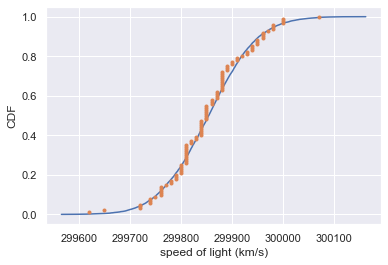

In [9]:
sns.set()
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('speed of light (km/s)')
plt.ylabel('CDF')
plt.show()

## Questions 3-4 (6 points, i.e., 3 pts each)

3. Does the empirical distribution of the data resemble a normal distribution? 
4. What other *plots* could you produce to better investigate (visually) the claim that the Michelson speed of light measurements are normally distributed? 

## Solution

3. Yes, the empirical distribution of the data resemble a normal distribution.


4. The histogram and the normal probability plot (showed above) are most common plots used to investigate if data is normally distributed. 

## Your turn (30 points)

Next, let's turn our attention to baby births.

In the real world, exponential distributions come up when we look at a series of events and measure the times between events, called *interarrival times*. If the events are equally likely to occur at any time, the distribution of interarrival times tends to look like an exponential distribution.

We will use the dataset from ``babies_brisbane.csv`` containing information about the time of birth for  44 babies born in a hospital in Brisbane, Australia, on December 18, 1997, as reported in the local paper. 

You should write code to:
1. Read the data and build a Pandas dataframe.
2. Compute the reciprocal of the mean of the sample exponential distribution (call this ``lam``, since ``lambda`` is a reserved word in Python).
3. Take 10,000 samples out of an exponential distribution with this scale using
``np.random.exponential()``.
4. Compute the CDF of the theoretical samples and the ECDF of the sample data, assigning the results to ``x_theor``, ``y_theor`` and ``x, y``, respectively.
5. Plot the CDF of your samples with the ECDF, with labeled axes.
6. Compute the Complementary CDF (CCDF) and plot the CCDF for both theoretical and sample values, on a log-y scale. (See Figure 5-2 in the textbook)

## Solution

In [10]:
babies_brisbane = pd.read_csv('data/babies_brisbane.csv')
diffs = babies_brisbane.minutes.diff()
# print (diffs)
lam = 1/np.mean(diffs)
print ('Lambda = {:.4f}'.format(lam))

Lambda = 0.0301


In [11]:
def ecdf(data):
    #number of data points:n
    n=len(data)
    #x-data for the ECDF
    x=np.sort(data)
    #y-data for ECDF;y
    y=np.arange(1, n+1)/n
    
    return x, y

mean = np.mean(diffs)
std = np.std(diffs)
print (mean)
print (std)

33.25581395348837
29.21539338061343


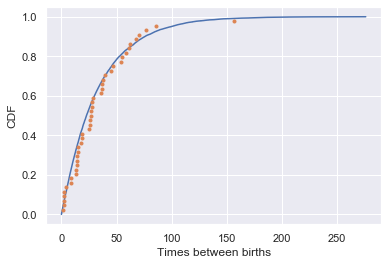

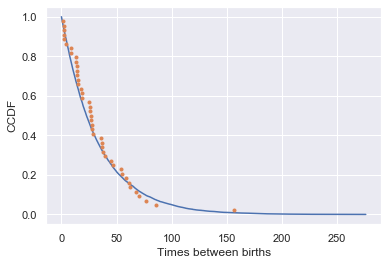

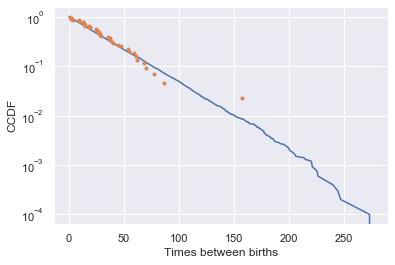

In [12]:
#Plot ECDF
samples =np.random.exponential(scale=1/lam, size = 10000)
x, y = ecdf(diffs)
x_theor, y_theor = ecdf(samples)


sns.set()
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Times between births')
plt.ylabel('CDF')
plt.show()

#Plot CCDF on al lineal scale & compute complementary values
y_c = 1-y
y_theor_c = 1-y_theor
sns.set()
plt.plot(x_theor, y_theor_c)
plt.plot(x, y_c, marker='.', linestyle='none')
plt.xlabel('Times between births')
plt.ylabel('CCDF')
plt.show()  

#Plot CCDF on a log scale
sns.set()
plt.yscale('log')
plt.plot(x_theor, y_theor_c)
plt.plot(x,y_c, marker='.', linestyle='none')
plt.xlabel('Times between births')
plt.ylabel('CCDF')
plt.show()  


-------------------
## Part 3: Moments and skewness

Let's revisit the dataset of salaries from Assignment 1 and use it to measure skewness.

In [13]:
salaries = pd.read_csv('data/salaries.csv')
salaries.describe()

,earn,height,ed,age
count,1192.000000,1192.000000,1192.000000,1192.000000
mean,23154.773490,66.915154,13.504195,41.378356
std,19472.296925,3.853968,2.420175,15.867428
min,200.000000,57.503219,3.000000,18.000000
25%,10000.000000,64.009746,12.000000,29.000000
50%,20000.000000,66.451265,13.000000,38.000000
75%,30000.000000,69.848100,16.000000,51.000000
max,200000.000000,77.051282,18.000000,91.000000


# Your turn (32 points, i.e., 8 pts each)

Write Python code to:
1. Compute the median and mean salary for the entire sample.
2. Compute the first raw moment and show that it is equivalent to computing the mean value.
3. Compute the second central moment and show that it is equivalent to computing the variance.
4. Compute the skewness using ``scipy.stats.skew``

## Solution

In [14]:
# Compute the median and mean salary for the entire sample.
salaries.mean()

earn      23154.773490
height       66.915154
ed           13.504195
age          41.378356
dtype: float64

In [15]:
salaries.median()

earn      20000.000000
height       66.451265
ed           13.000000
age          38.000000
dtype: float64

In [16]:
#2. Compute the first raw moment and show that it is equivalent to computing the mean value.
#Mean calculation
mean = np.mean(salaries["earn"])
mean


23154.773489932886

In [17]:
#First Raw Moment calculation
earnings = np.array(salaries['earn'])
def RawMoment(xs,k):
    return sum (x**k for x in xs)/len(xs)
print(RawMoment(earnings,1))


23154.773489932886


Mean and First Raw Moment are equivalents both has the same result

In [18]:
#3.Compute the second central moment and show that it is equivalent to computing the variance

#Variance calculation
variance = salaries['earn'].var(ddof=0)
variance

378852251.6248667

In [19]:
earnings=np.array(salaries['earn'])
def CentralMoment(xs,k):
    mean = RawMoment(xs,1)
    return sum((x - mean)**k for x in xs) / len(xs)
print(CentralMoment(earnings,2))

378852251.6248667


Variance and Second Central Moment are equivalents both has the same results.

In [20]:
#4.Compute the skewness using scipy.stats.skew

from scipy.stats import skew
skew(salaries['earn'].dropna())

2.880309741267592

## Question 5 (6 points)

5. How do you interpret the value of skewness computed by your code?

## Solution

The scipy.stat.skew() function calculates the skewness of the dataset. If the skewness = 0 means that it is normally distributed. If the skewness > 0 means it has more weight in the left tail of the distribution. If the skewness < 0 means it has more weight in the right tail of the distribution. In this case, the result is 2.880309741267592 which means that it has more weight to the right pail of the distribution.

## Bonus! (20 points)

Write code to repeat the steps above, this time for male and female employees separately.

## Solution

In [54]:
#1.Compute the median and mean salary for the entire sample.
#Median calculation for women and men
gender_median=salaries.groupby('sex').earn.median()
gender_median

sex
female    15000.0
male      25000.0
Name: earn, dtype: float64

In [55]:
#2.Compute the first raw moment and show that it is equivalent to computing the mean value.
#Mean calculation for women and men
gender_mean=salaries.groupby('sex').earn.mean()
gender_mean

sex
female    18280.195051
male      29786.130693
Name: earn, dtype: float64

In [56]:
#First raw moment for men
men_earnings = salaries[salaries["sex"] == "male"]["earn"]
def RawMoment(xs,k):
    return sum (x**k for x in xs)/len(xs)
print(RawMoment(men_earnings,1))

29786.130693069306


In [57]:
#First raw moment for women
women_earnings = salaries[salaries["sex"] == "female"]["earn"]
def RawMoment(xs,k):
    return sum (x**k for x in xs)/len(xs)
print(RawMoment(women_earnings,1))

18280.195050946142


In [58]:
#3.Compute the second central moment and show that it is equivalent to computing the variance.

variance_by_gender = salaries.groupby('sex').earn.var(ddof=0)
variance_by_gender

sex
female    2.030497e+08
male      5.417134e+08
Name: earn, dtype: float64

In [59]:
#Calculation Second Central Moment for men
def CentralMoment(xs,k):
    mean = RawMoment(xs,1)
    return sum((x - mean)**k for x in xs) / len(xs)
print(CentralMoment(men_earnings,2))

541713403.7611367


In [60]:
#Calculation Second Central Moment for women
def CentralMoment(xs,k):
    mean = RawMoment(xs,1)
    return sum((x - mean)**k for x in xs) / len(xs)
print(CentralMoment(women_earnings,2))

203049680.62862173


In [61]:
#4.Compute the skewness using scipy.stats.skew
#skeness calcultion for men
from scipy.stats import skew
skew(men_earnings.dropna())

2.733752806565786

In [62]:
#skeness calculation for women
from scipy.stats import skew
skew(women_earnings.dropna())

2.234266764847592

## Conclusions (20 points)

Write your conclusions and make sure to address the issues below:
- What have you learned from this assignment?
- Which parts were the most fun, time-consuming, enlightening, tedious?
- What would you do if you had an additional week to work on this?

## Solution

1-I learned how to generate PDF, CDF and CCDF graphs for exponetial distributions. Also, I learned how to graph several exponential functions using different Lambda in the same graph. Moreover, I learned when Empirical distribution resemble a normal distribution and how to plot them. Furthermore,I learned about interarrivel, moments and skewness.

2.The part that I enjoy most was calculated the chances of a horse matching or beating Secretariat's record. The most time consuming was calculated the first moment, second moment and skewness of men and women separatelly. The enlightening part was graph several distributions on the same graph. The most tedious part was compute the Complementary CDF (CCDF).

3.If I had one more week to work on this assignment, I will spend more time in the last bonus points.